In [18]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('분석용.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()

In [19]:
# df1과 df2의 변수 목록 출력
df1_variables = df1.columns.tolist()
print("df1의 변수:", df1_variables)

df1의 변수: ['기준연도', '시군명', '연령대', '성별', '결제건수', '결제금액', '결제취소건수', '결제취소금액', '1회평균결제금액', '총인구', '총인구_남', '총인구_여', '내국인_세대수', '내국인_총인구', '내국인_남', '내국인_여', '등록외국인_총인구', '등록외국인_남', '등록외국인_여', '관광객수', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수', '결제취소건수 비율', '결제취소금액 비율', '월별신규가입자수(명)', '월별충전액(만원)', '신규가입자수 비율', '2024개수', '2022개수', '증가분', 'cluster', 'pca_x', 'pca_y']


In [20]:
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,결제취소금액 비율,월별신규가입자수(명),월별충전액(만원),신규가입자수 비율,2024개수,2022개수,증가분,cluster,pca_x,pca_y
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,1.35,"10,557.00","4,182,600.00",0.17,3354,3553,-199,2,-4.86,1.00
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,1.35,"10,557.00","4,182,600.00",0.17,3354,3553,-199,2,-4.86,1.00
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,1.35,"10,557.00","4,182,600.00",0.17,3354,3553,-199,2,-4.86,1.00
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,1.35,"10,557.00","4,182,600.00",0.17,3354,3553,-199,2,-4.86,1.00
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,1.35,"10,557.00","4,182,600.00",0.17,3354,3553,-199,2,-4.86,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,0.67,"167,965.00","33,758,061.00",0.18,27663,26308,1355,1,3.27,2.99
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,0.67,"167,965.00","33,758,061.00",0.18,27663,26308,1355,1,3.27,2.99
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,0.67,"167,965.00","33,758,061.00",0.18,27663,26308,1355,1,3.27,2.99
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,0.67,"167,965.00","33,758,061.00",0.18,27663,26308,1355,1,3.27,2.99


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_5816\3563588034.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_5816\3563588034.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_5816\3563588034.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, pal

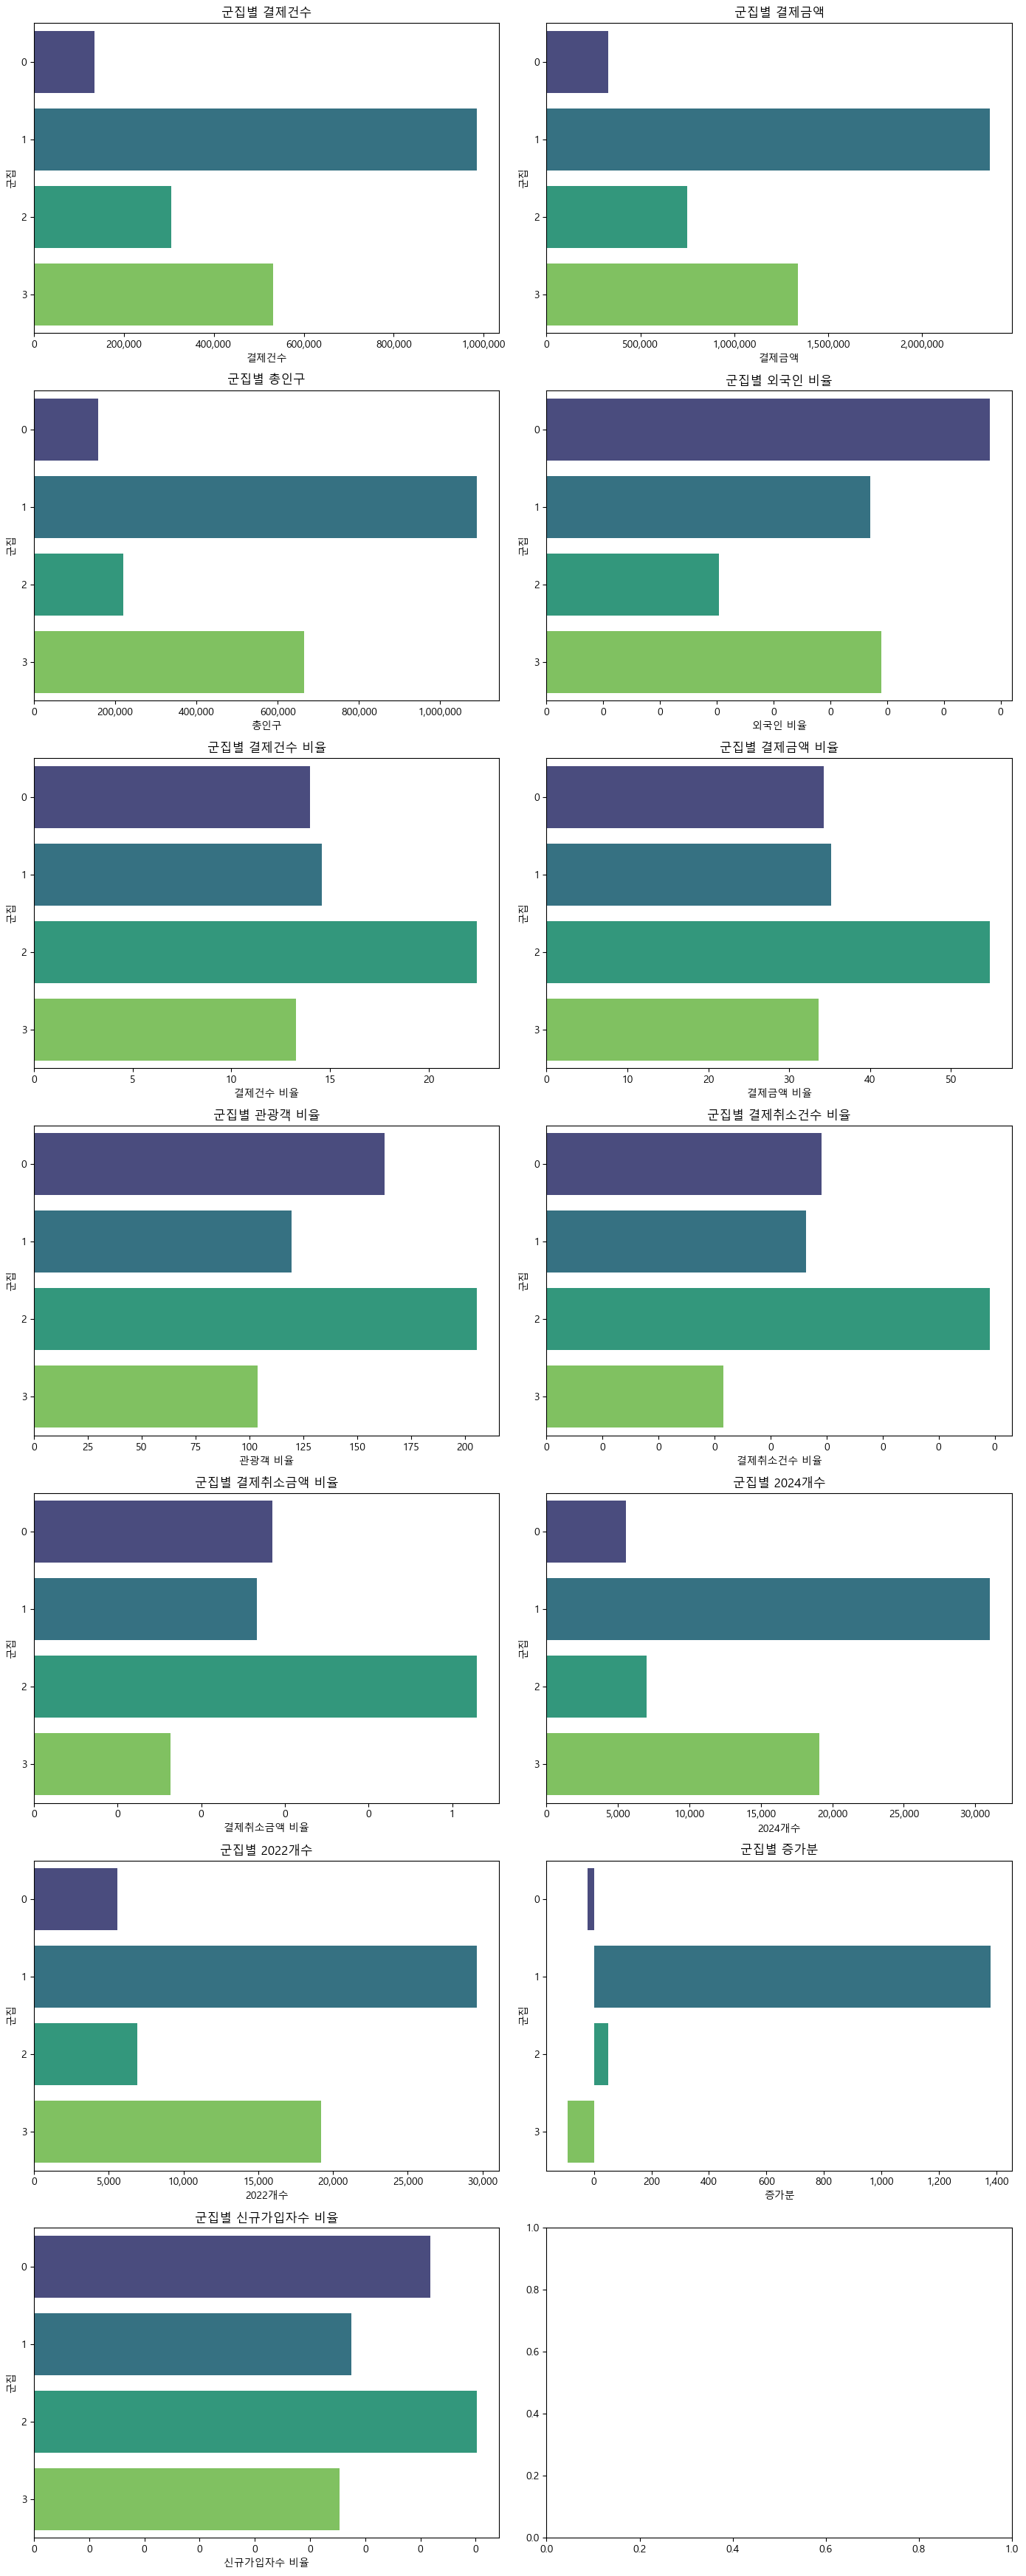

In [21]:
# 군집별 특징

# 시각화할 데이터와 플롯의 개수
plot_titles = [
    '결제건수',
    '결제금액',
    '총인구',
    '외국인 비율',
    '결제건수 비율',
    '결제금액 비율',
    '관광객 비율',
    '결제취소건수 비율', 
    '결제취소금액 비율',
    '2024개수',
    '2022개수',
    '증가분',
    '신규가입자수 비율'
]

# 서브플롯 개수 설정
num_plots = len(plot_titles)

# 서브플롯 배열의 행과 열 개수 설정
ncols = 2  # 2열로 설정
nrows = (num_plots + ncols - 1) // ncols  # 행 개수 계산

# 서브플롯 생성
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
axs = axs.flatten()  # axs를 1D 배열로 평탄화

# 서브플롯 데이터와 그래프 그리기
for i, title in enumerate(plot_titles):
    if i >= len(axs):  # 서브플롯이 부족할 경우
        break
    ax = axs[i]
    
    # 군집별로 해당 데이터의 평균을 계산
    cluster_data = df1.groupby('cluster')[title].mean().reset_index()
    
    # 가로 막대 그래프 시각화
    sns.barplot(x=title, y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
    ax.set_title(f'군집별 {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('군집')

    # 축의 숫자 형식을 일반 숫자로 변경
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [24]:
df1.dtypes

기준연도             int64
시군명              int32
연령대              int32
성별               int32
결제건수             int64
결제금액           float64
결제취소건수         float64
결제취소금액         float64
1회평균결제금액       float64
총인구            float64
총인구_남          float64
총인구_여          float64
내국인_세대수        float64
내국인_총인구        float64
내국인_남          float64
내국인_여          float64
등록외국인_총인구      float64
등록외국인_남        float64
등록외국인_여        float64
관광객수           float64
총결제건수(연도별)       int64
총결제금액(연도별)     float64
외국인 비율         float64
결제건수 비율        float64
결제금액 비율        float64
관광객 비율         float64
인구 대비 관광객 수    float64
결제취소건수 비율      float64
결제취소금액 비율      float64
월별신규가입자수(명)    float64
월별충전액(만원)      float64
신규가입자수 비율      float64
2024개수           int64
2022개수           int64
증가분              int64
cluster          int64
pca_x          float64
pca_y          float64
dtype: object

In [22]:
# 필요한 변수 선택 및 전처리
df1['연령대'] = LabelEncoder().fit_transform(df1['연령대'])
df1['성별'] = LabelEncoder().fit_transform(df1['성별'])
df1['시군명'] = LabelEncoder().fit_transform(df1['시군명'])

# 군집별로 데이터 나누기
clusters = df1['cluster'].unique()

# 각 군집별로 회귀분석 수행
for cluster in clusters:
    cluster_df = df1[df1['cluster'] == cluster]
    
    # 독립변수(X)와 종속변수(y) 설정
    X = cluster_df[['연령대', '성별', '총인구', '월별신규가입자수(명)', '월별충전액(만원)', '신규가입자수 비율', '2024개수', '2022개수', '증가분', 'pca_x', 'pca_y']]
    y = cluster_df['결제금액']
    
    # 상수항 추가
    X = sm.add_constant(X)
    
    # 회귀모델 적합
    model = sm.OLS(y, X).fit()
    
    # 결과 출력
    print(f'군집 {cluster}의 회귀분석 결과:')
    print(model.summary())
    print('\n' + '='*80 + '\n')

군집 2의 회귀분석 결과:
                            OLS Regression Results                            
Dep. Variable:                   결제금액   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     10.10
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           5.65e-15
Time:                        15:51:13   Log-Likelihood:                -5530.9
No. Observations:                 368   AIC:                         1.108e+04
Df Residuals:                     357   BIC:                         1.113e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6688.0393   1.01e+06  

<hr>

필요할까봐 놔둔 코드

In [23]:
# # 군집별 결제건수 평균 계산
# cluster_data = df1.groupby('cluster')['결제건수'].mean().reset_index()

# # 서브플롯 생성
# fig, ax = plt.subplots(figsize=(10, 6))

# # 가로 막대 그래프 시각화
# sns.barplot(x='결제건수', y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
# ax.set_title('군집별 결제건수 평균')
# ax.set_xlabel('결제건수 평균')
# ax.set_ylabel('군집')

# # 축의 숫자 형식을 일반 숫자로 변경
# ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# # 레이아웃 조정
# plt.tight_layout()
plt.show()